In [2]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados dos times da API da NBA
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

# Obter a lista de times da NBA
nba_teams = teams.get_teams()

# Criar um dicionário com os IDs dos times
team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}

# Criar um DataFrame vazio para armazenar os dados
df = pd.DataFrame()

# Percorrer os times e adicionar os dados ao DataFrame
for team_name, team_id in team_ids_dict.items():
    team_info = TeamInfoCommon(team_id=team_id)  # Obter informações sobre o time
    df_team = team_info.get_data_frames()[0]  # Selecionar o primeiro DataFrame retornado
    df_team['TeamName'] = team_name  # Adicionar o nome do time ao DataFrame
    df_team['Season'] = '2024-25'  # Adicionar a temporada ao DataFrame
    df = pd.concat([df, df_team], ignore_index=True)  # Concatenar ao DataFrame principal

# Exibir o DataFrame combinado
df


,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR,TeamName,Season
0,1610612737,2024-25,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,11,11,0.500,6,2,1949,2024,Atlanta Hawks,2024-25
1,1610612738,2024-25,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,17,4,0.810,2,1,1946,2024,Boston Celtics,2024-25
2,1610612739,2024-25,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,19,3,0.864,1,1,1970,2024,Cleveland Cavaliers,2024-25
3,1610612740,2024-25,New Orleans,Pelicans,NOP,West,Southwest,pelicans,pelicans,4,18,0.182,15,5,2002,2024,New Orleans Pelicans,2024-25
4,1610612741,2024-25,Chicago,Bulls,CHI,East,Central,bulls,bulls,9,13,0.409,8,3,1966,2024,Chicago Bulls,2024-25
5,1610612742,2024-25,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,14,8,0.636,3,2,1980,2024,Dallas Mavericks,2024-25
6,1610612743,2024-25,Denver,Nuggets,DEN,West,Northwest,nuggets,nuggets,11,8,0.579,8,2,1976,2024,Denver Nuggets,2024-25
7,1610612744,2024-25,Golden State,Warriors,GSW,West,Pacific,warriors,warriors,12,8,0.600,7,3,1946,2024,Golden State Warriors,2024-25
8,1610612745,2024-25,Houston,Rockets,HOU,West,Southwest,rockets,rockets,15,7,0.682,2,1,1967,2024,Houston Rockets,2024-25
9,1610612746,2024-25,LA,Clippers,LAC,West,Pacific,clippers,clippers,14,9,0.609,5,1,1970,2024,Los Angeles Clippers,2024-25


In [3]:
# Coletando da API informações sobre os jogadores da NBA
from nba_api.stats.static import players
player_dict = players.get_players()

In [4]:
# Coletando informações sobre o jogador
nj = [player for player in player_dict if player['full_name'] == 'Nikola Jokić'][0]
nj_id = nj['id']
nj

{'id': 203999,
 'full_name': 'Nikola Jokić',
 'first_name': 'Nikola',
 'last_name': 'Jokić',
 'is_active': True}

In [5]:
# Importando dados da API
from nba_api.stats.endpoints import playergamelog

# Coletando os dados do jogador via api
gamelog_jokic = playergamelog.PlayerGameLog(player_id='203999', season = '2024')
df_jokic_games_2024= gamelog_jokic.get_data_frames()

In [6]:
# Extraindo o DataFrame da lista
df_jokic_games_2024_df = df_jokic_games_2024[0]

# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_jokic = df_jokic_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_jokic.head(20))

        MATCHUP WL  MIN  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   DEN vs. GSW  W   40   14   24   38   10    6          23
1     DEN @ LAC  L   39   12   24   28   14   11          -7
2     DEN @ UTA  W   34   13   19   30   10    7          20
3   DEN vs. NYK  L   32    9   20   22    7    7         -20
4     DEN @ LAL  W   37   12   20   34   13    8          39
5   DEN vs. DAL  L   39   13   22   33   17   10           4
6   DEN vs. DAL  W   38   13   21   37   18   15          13
7   DEN vs. MIA  W   40   11   13   30   11   14          26
8   DEN vs. OKC  W   39    9   20   23   20   16           8
9   DEN vs. TOR  W   38   10   22   28   14   13          -1
10  DEN vs. UTA  W   30   10   18   27   16    9          31
11    DEN @ MIN  L   40    8   16   26    9   13           6
12    DEN @ BKN  W   41    9   16   29   18   16           8
13    DEN @ TOR  W   44   18   27   40   10    4           9
14  DEN vs. LAC  L   37   14   26   41    9    4           7
15  DEN vs. OKC  L   35 

In [20]:
# Exibindo a média das colunas selecionadas
average_stats_jokic = df_jokic[['MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_jokic)

MIN           37.7
FGM           11.3
FGA           20.1
PTS           30.1
REB           13.0
AST           10.4
PLUS_MINUS     9.8
dtype: float64


In [8]:
# Salvando o DataFrame em CSV
df_jokic.to_csv('jokic_games_2024.csv', index=False)

In [9]:
# Coletando informações sobre o jogador
jt = [player for player in player_dict if player['full_name'] == 'Jayson Tatum'][0]
jt_id = jt['id']
jt

{'id': 1628369,
 'full_name': 'Jayson Tatum',
 'first_name': 'Jayson',
 'last_name': 'Tatum',
 'is_active': True}

In [10]:
# Coletando os dados do jogador via api
gamelog_tatum = playergamelog.PlayerGameLog(player_id='1628369', season = '2024')
df_tatum_games_2024= gamelog_tatum.get_data_frames()

In [11]:
# Extraindo o DataFrame da lista
df_tatum_games_2024_df = df_tatum_games_2024[0]

# Exibindo o DataFrame
print(df_tatum_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024    1628369  0022400316  DEC 02, 2024  BOS vs. MIA  W   36    7   
1      22024    1628369  0022400307  DEC 01, 2024    BOS @ CLE  L   38   12   
2      22024    1628369  0022400047  NOV 29, 2024    BOS @ CHI  W   36   12   
3      22024    1628369  0022400281  NOV 25, 2024  BOS vs. LAC  W   30    7   
4      22024    1628369  0022400271  NOV 24, 2024  BOS vs. MIN  W   38    8   
5      22024    1628369  0022400028  NOV 22, 2024    BOS @ WAS  W   37    6   
6      22024    1628369  0022400021  NOV 19, 2024  BOS vs. CLE  W   38   11   
7      22024    1628369  0022400230  NOV 16, 2024  BOS vs. TOR  W   42    7   
8      22024    1628369  0022400218  NOV 13, 2024    BOS @ BKN  W   35   12   
9      22024    1628369  0022400001  NOV 12, 2024  BOS vs. ATL  L   37    5   
10     22024    1628369  0022400202  NOV 10, 2024    BOS @ MIL  W   40    7   
11     22024    1628369  0022400187  NOV 08, 2024  B

In [12]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_tatum = df_tatum_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_tatum.head(20))

        MATCHUP WL  MIN  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   BOS vs. MIA  W   36    7   21   18   11    4          13
1     BOS @ CLE  L   38   12   27   33    8    4           1
2     BOS @ CHI  W   36   12   18   35   14    5          13
3   BOS vs. LAC  W   30    7   15   20    9    4          15
4   BOS vs. MIN  W   38    8   21   26    8    4           7
5     BOS @ WAS  W   37    6   19   16    9    8          20
6   BOS vs. CLE  W   38   11   22   33   12    7           2
7   BOS vs. TOR  W   42    7   19   24   11    9           1
8     BOS @ BKN  W   35   12   19   36    9   10          24
9   BOS vs. ATL  L   37    5   16   20    6    8           4
10    BOS @ MIL  W   40    7   21   31   12    6           9
11  BOS vs. BKN  W   42   11   25   33    9    6          10
12  BOS vs. GSW  L   37   10   20   32    4    2          -5
13    BOS @ ATL  W   30   10   21   28    6    9          27
14    BOS @ CHA  W   34    7   15   29    7    3           4
15    BOS @ CHA  W   36 

In [19]:
# Exibindo a média das colunas selecionadas
average_stats_tatum = df_tatum[['MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_tatum)

MIN           36.3
FGM            9.1
FGA           20.1
PTS           28.4
REB            8.6
AST            5.6
PLUS_MINUS    10.1
dtype: float64


In [14]:
# Salvando o DataFrame em CSV
df_tatum.to_csv('tatum_games_2024.csv', index=False)

In [15]:
# Contando vitórias e derrotas para Jokić
wl_count_jokic = df_jokic['WL'].value_counts()

# Contando vitórias e derrotas para Tatum
wl_count_tatum = df_tatum['WL'].value_counts()

In [16]:
# Calculando as estatísticas médias para Jokić
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)

# Calculando as estatísticas médias para Tatum
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)

# Comparando as estatísticas médias
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic Average": average_stats_jokic.values,
    "Tatum Average": average_stats_tatum.values
})

# Adicionando contagem de vitórias e derrotas
comparison = pd.concat([
    comparison,
    pd.DataFrame({
        "Stat": ["Wins", "Losses"],
        "Jokic Average": [wl_count_jokic.get('W', 0), wl_count_jokic.get('L', 0)],
        "Tatum Average": [wl_count_tatum.get('W', 0), wl_count_tatum.get('L', 0)]
    })
], ignore_index=True)

# Exibindo a comparação
print(comparison)

         Stat  Jokic Average  Tatum Average
0         MIN           37.7           36.3
1         FGM           11.3            9.1
2         FGA           20.1           20.1
3         PTS           30.1           28.4
4         REB           13.0            8.6
5         AST           10.4            5.6
6  PLUS_MINUS            9.8           10.1
7        Wins           10.0           17.0
8      Losses            6.0            4.0


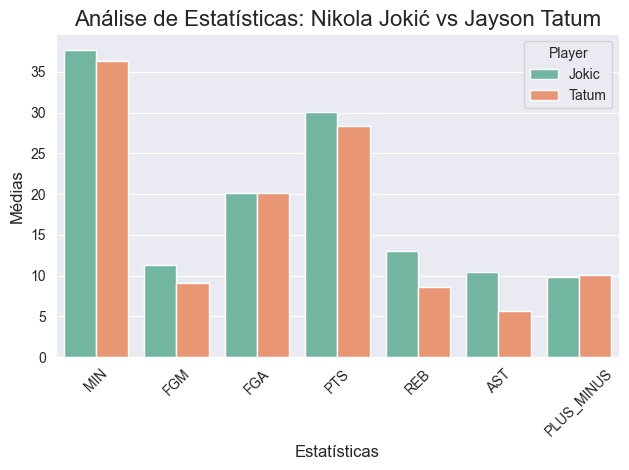

In [17]:
# Calculando as estatísticas médias para Jokić e Tatum
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)

# Criando um DataFrame para o gráfico
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic": average_stats_jokic.values,
    "Tatum": average_stats_tatum.values
})

# Transformando o DataFrame para formato longo (long format)
comparison_long = comparison.melt(id_vars="Stat", var_name="Player", value_name="Average")

# Gerando o gráfico de barras
sns.barplot(
    data=comparison.melt(id_vars="Stat", var_name="Player", value_name="Average"),
    x="Stat",
    y="Average",
    hue="Player",
    palette=sns.color_palette("Set2", 2)
)

# Adicionando título e rótulos
plt.title("Análise de Estatísticas: Nikola Jokić vs Jayson Tatum", fontsize=16)
plt.ylabel("Médias", fontsize=12)
plt.xlabel("Estatísticas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Player")
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Exibindo o gráfico
plt.show()


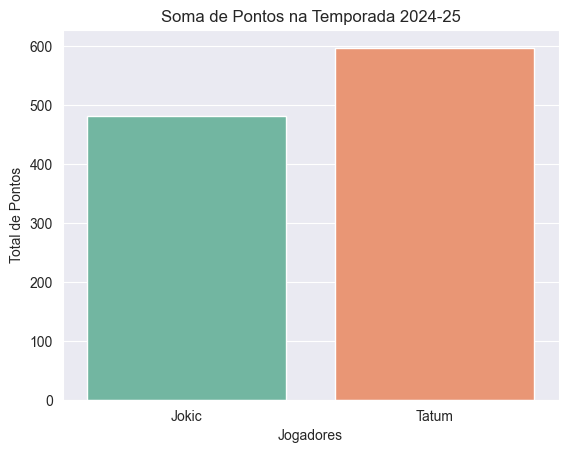

In [18]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['PTS'].sum()
total_points_tatum = df_tatum['PTS'].sum()
players = ['Jokic', 'Tatum']
total_points = [total_points_jokic, total_points_tatum]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Pontos na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Pontos")
plt.show()